In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Path to the zip file
zip_file_path = '/content/validation.zip'
# Destination folder to extract the contents
destination_folder = '/content/extracted'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents to the destination folder
    zip_ref.extractall(destination_folder)

# Optionally, you can specify individual files to extract from the zip file
# by providing their names in a list to the 'extractall' or 'extract' method.

# Example: Extract only specific files from the zip file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     files_to_extract = ['file1.txt', 'file2.jpg']
#     zip_ref.extractall(destination_folder, members=files_to_extract)

print('Extraction complete.')


Extraction complete.


# RPN with CNN Model


In [ ]:
import os
import cv2
import numpy as np
from lxml import etree
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import tensorflow as tf

input_folder = r'/content/extracted/train'
input_shape = (300, 300, 3)
X = []
y_classification = []
y_regression = []

for filename in os.listdir(input_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        image_filepath = os.path.join(input_folder, filename)
        xml_filename = os.path.splitext(filename)[0] + '.xml'
        xml_filepath = os.path.join(input_folder, xml_filename)

        if os.path.isfile(xml_filepath):
            with open(xml_filepath, 'r') as file:
                xml_data = file.read()

            tree = etree.fromstring(xml_data)

            try:
                xmin = int(tree.xpath("object/bndbox/xmin")[0].text)
                ymin = int(tree.xpath("object/bndbox/ymin")[0].text)
                xmax = int(tree.xpath("object/bndbox/xmax")[0].text)
                ymax = int(tree.xpath("object/bndbox/ymax")[0].text)
            except IndexError:
                print(f"Skipping file '{filename}'. Bounding box coordinates not found in XML.")
                continue

            image = cv2.imread(image_filepath)
            image = cv2.resize(image, (input_shape[1], input_shape[0]))
            image = image / 255.0

            X.append(image)
            y_classification.append(1)
            y_regression.append([xmax, xmin, ymax, ymin])

        else:
            print(f"XML file not found for '{filename}'")
    else:
        print(f"Ignored non-image file '{filename}'")

X = np.array(X)
y_classification = np.array(y_classification)
y_regression = np.array(y_regression)

y_regression = y_regression / 255.0

valid_indices = np.where(y_regression[:, 0] != 0)[0]
X = X[valid_indices]
y_classification = y_classification[valid_indices]
y_regression = y_regression[valid_indices]

X_train, X_val, y_train_classification, y_val_classification, y_train_regression, y_val_regression = train_test_split(
    X, y_classification, y_regression, test_size=0.2, random_state=42
)


In [ ]:
# def r_cnn_model(input_shape):
#     input_layer = Input(shape=input_shape)

#     # Region proposal network (RPN) for generating region proposals
#     rpn_layers = Conv2D(128, (3, 3), activation='relu')(input_layer)
#     rpn_layers = MaxPooling2D((2, 2))(rpn_layers)
#     rpn_layers = Conv2D(128, (3, 3), activation='relu')(rpn_layers)
#     rpn_layers = MaxPooling2D((2, 2))(rpn_layers)
#     rpn_layers = Flatten()(rpn_layers)
#     rpn_layers = Dense(256, activation='relu')(rpn_layers)
#     rpn_proposals = Dense(4)(rpn_layers)

#     # Feature extraction network (CNN)
#     cnn_layers = Conv2D(64, (3, 3), activation='relu')(input_layer)
#     cnn_layers = MaxPooling2D((2, 2))(cnn_layers)
#     cnn_layers = Conv2D(128, (3, 3), activation='relu')(cnn_layers)
#     cnn_layers = MaxPooling2D((2, 2))(cnn_layers)
#     cnn_layers = Conv2D(256, (3, 3), activation='relu')(cnn_layers)
#     cnn_layers = MaxPooling2D((2, 2))(cnn_layers)
#     cnn_layers = Flatten()(cnn_layers)

#     # Regression layer
#     regression_layers = Dense(4)(cnn_layers)

#     # Create the R-CNN model
#     model = Model(inputs=input_layer, outputs=[rpn_proposals, regression_layers])

#     return model


# # Set the number of classes
# num_classes = 1  # Adjust according to the number of classes in your dataset

# # Create the R-CNN model
# model = r_cnn_model(input_shape)

# # Compile the model
# model.compile(optimizer='adam', loss=['mean_squared_error', 'mean_squared_error'], metrics=['accuracy'])

# # Set the batch size
# batch_size = 8

# # Train the model with the specified batch size
# history = model.fit(X_train, [y_train_regression, y_train_regression],
#                     batch_size=batch_size, epochs=15,
#                     validation_data=(X_val, [y_val_regression, y_val_regression]))

In [ ]:
# model.save('/content/drive/MyDrive/ANPR with cnn/Final RPN CNN model.h5')

### Loading Model

In [ ]:
import os
import cv2
import numpy as np
from lxml import etree
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import load_model

model_path = '/content/drive/MyDrive/ANPR with cnn/Final RPN CNN model.h5'

model = load_model(model_path)

### Checking annotations


In [ ]:
# import matplotlib.pyplot as plt

# # Plotting training and validation loss
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(1, len(loss) + 1)

# plt.style.use('seaborn')
# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# # Add gridlines
# plt.grid(True, linestyle='--', alpha=0.5)

# # Customize tick labels
# plt.xticks(epochs)
# plt.yticks()


# # Add axis labels and title with larger fonts
# plt.xlabel('Epochs', fontsize=12)
# plt.ylabel('Loss', fontsize=12)
# plt.title('Training and Validation Loss', fontsize=14)

# # Adjust spacing
# plt.tight_layout()

# # Show the plot
# plt.show()


## All Metrics of RPN + CNN model

In [ ]:
# Evaluate the model on the validation set
loss, rpn_proposals_loss,  regression_loss, rpn_proposals_mse,  regression_mse = model.evaluate(X_val, [y_val_regression, y_val_classification, y_val_regression])

# Print the evaluation metrics
print("Evaluation metrics:")
print("Total loss:", loss)
print("RPN Proposals Loss:", rpn_proposals_loss)
print("Regression Loss:", regression_loss)
print("RPN Proposals MSE:", rpn_proposals_mse)
print("Regression MSE:", regression_mse)


8/8 [==============================] - 13s 339ms/step - loss: 0.1933 - dense_1_loss: 0.0034 - dense_2_loss: 0.1899 - dense_1_accuracy: 0.9046 - dense_2_accuracy: 0.4191
Evaluation metrics:
Total loss: 0.19331304728984833
RPN Proposals Loss: 0.0034339341800659895
Regression Loss: 0.18987910449504852
RPN Proposals MSE: 0.9045643210411072
Regression MSE: 0.41908714175224304


### Testing on a whole Folder

1/1 [==============================] - 0s 444ms/step


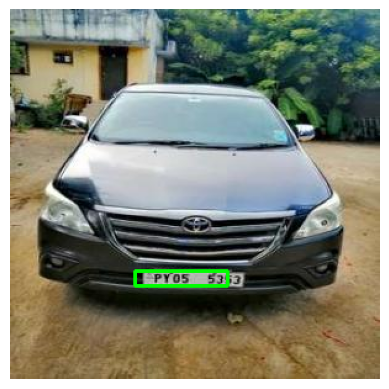

1/1 [==============================] - 0s 31ms/step


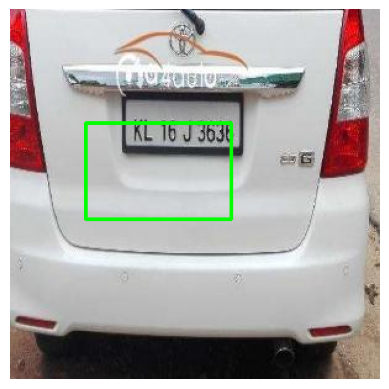

1/1 [==============================] - 0s 30ms/step


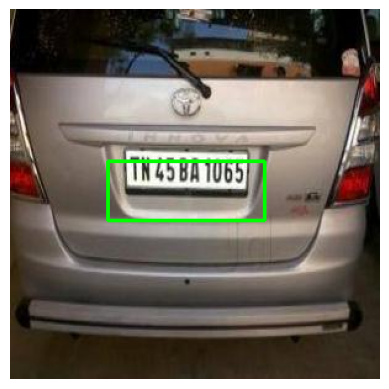

1/1 [==============================] - 0s 40ms/step


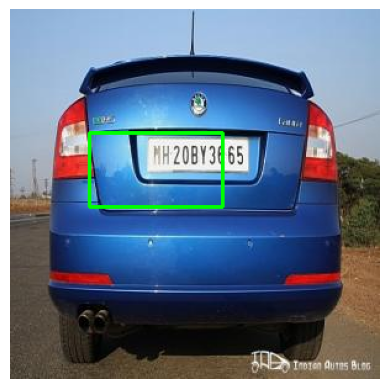

1/1 [==============================] - 0s 35ms/step


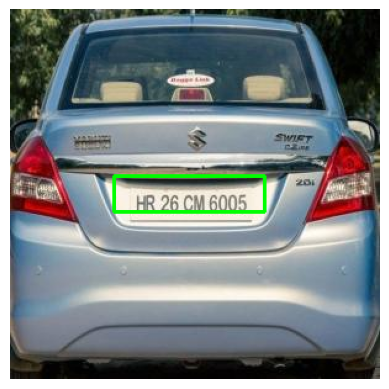

1/1 [==============================] - 0s 31ms/step


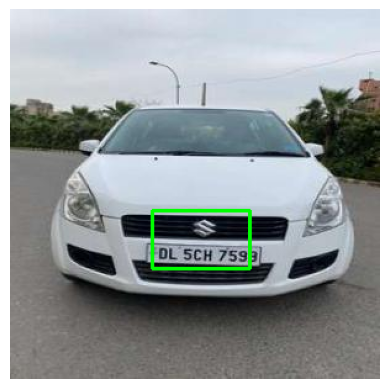

1/1 [==============================] - 0s 30ms/step


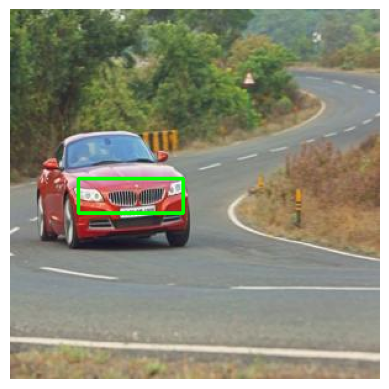

1/1 [==============================] - 0s 31ms/step


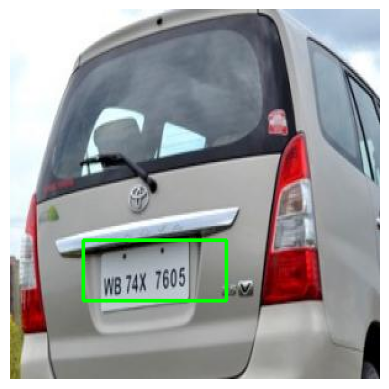

1/1 [==============================] - 0s 43ms/step


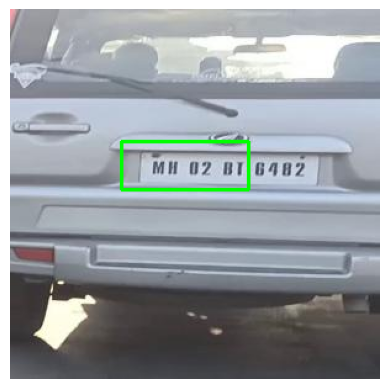

1/1 [==============================] - 0s 32ms/step


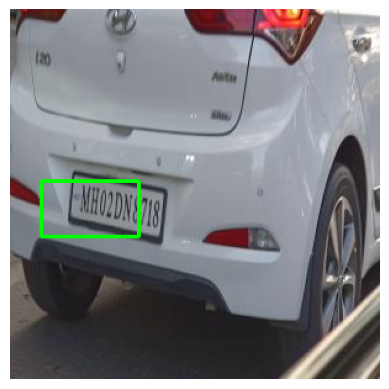

1/1 [==============================] - 0s 47ms/step


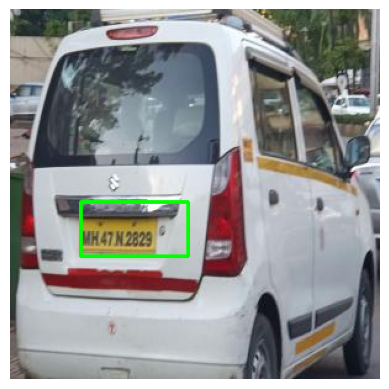

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the folder containing the test images
test_folder = '/content/extracted/validation 2'

# Load the saved model
# model = tf.keras.models.load_model('R-CNN model.h5')
input_shape  = (300,300,3)

i = 0

# Iterate over each image in the test folder
for filename in os.listdir(test_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        image_path = os.path.join(test_folder, filename)

        # Read the image
        image = cv2.imread(image_path)
        original_image = image.copy()  # Keep a copy for visualization

        # Preprocess the image
        image = cv2.resize(image, (input_shape[1], input_shape[0]))
        image = image / 255.0
        image = np.expand_dims(image, axis=0)

        # if i ==10:
        #     break
        i+=1
        # Make predictions
        rpn_proposals,  regression = model.predict(image)

        # Get the predicted bounding box coordinates
        xmin, xmax, ymin, ymax = regression[0]
        xmin = int(xmin * 255)
        xmax = int(xmax * 255)
        ymin = int(ymin * 255)
        ymax = int(ymax * 255)

        # Draw the predicted bounding box on the original image
        cv2.rectangle(original_image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

        # Display the image with the predicted bounding box
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
